In [134]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [2]:
taxi_2019 = pd.read_csv('yellow_tripdata_2019-02.csv', parse_dates = True,
                       infer_datetime_format = True)

In [3]:
taxi_2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,N,48,234,1,9.0,0.5,0.5,2.0,0.0,0.3,12.3,0.0
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,N,230,93,2,32.0,0.5,0.5,0.0,0.0,0.3,33.3,0.0
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,N,95,95,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,N,140,263,2,5.0,0.5,0.5,0.0,0.0,0.3,6.3,0.0


In [4]:
taxi_2019.drop(['VendorID','store_and_fwd_flag','improvement_surcharge'], axis=1, inplace=True) #dropping unnecessary columns

In [5]:
taxi_2019.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
taxi_2019['DateTime'] = pd.to_datetime(taxi_2019['tpep_pickup_datetime'])

In [7]:
taxi_2019.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,DateTime
0,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,48,234,1,9.0,0.5,0.5,2.0,0.0,12.3,0.0,2019-02-01 00:59:04
1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,230,93,2,32.0,0.5,0.5,0.0,0.0,33.3,0.0,2019-02-01 00:33:09
2,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,145,145,2,2.5,0.5,0.5,0.0,0.0,3.8,0.0,2019-02-01 00:09:03
3,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,95,95,2,5.5,0.5,0.5,0.0,0.0,6.8,0.0,2019-02-01 00:45:38
4,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,140,263,2,5.0,0.5,0.5,0.0,0.0,6.3,0.0,2019-02-01 00:25:30


In [8]:
taxi_2019.dtypes

tpep_pickup_datetime             object
tpep_dropoff_datetime            object
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
total_amount                    float64
congestion_surcharge            float64
DateTime                 datetime64[ns]
dtype: object

In [9]:
taxi_2019.assign(TimeofDay=pd.cut(taxi_2019.DateTime.dt.hour,[0,6,10,16,20],
                         labels=['Night','Morning','Afternoon','Evening']))

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,DateTime,TimeofDay
0,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,48,234,1,9.0,0.5,0.5,2.0,0.0,12.3,0.0,2019-02-01 00:59:04,NaN
1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,230,93,2,32.0,0.5,0.5,0.0,0.0,33.3,0.0,2019-02-01 00:33:09,NaN
2,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,145,145,2,2.5,0.5,0.5,0.0,0.0,3.8,0.0,2019-02-01 00:09:03,NaN
3,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,95,95,2,5.5,0.5,0.5,0.0,0.0,6.8,0.0,2019-02-01 00:45:38,NaN
4,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,140,263,2,5.0,0.5,0.5,0.0,0.0,6.3,0.0,2019-02-01 00:25:30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019370,2019-02-28 23:29:08,2019-02-28 23:29:11,1,0.0,1,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-02-28 23:29:08,NaN
7019371,2019-02-28 22:48:47,2019-02-28 23:50:19,1,0.0,1,141,193,2,0.0,0.0,0.0,0.0,0.0,0.0,2.5,2019-02-28 22:48:47,NaN
7019372,2019-02-28 23:41:23,2019-02-28 23:42:23,1,0.0,1,264,264,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-02-28 23:41:23,NaN
7019373,2019-02-28 23:12:52,2019-02-28 23:14:16,1,0.0,1,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-02-28 23:12:52,NaN


In [10]:
taxi_2019['hour']=taxi_2019.DateTime.dt.hour//2 #now i have 12 groups that are 2 hours each

In [11]:
taxi_2019.sample(10) 
#6am - 10am is groups 3 + 4
#4pm - 8 pm is groups 8 + 9

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,DateTime,hour
2954929,2019-02-12 14:11:45,2019-02-12 14:25:55,1,1.95,1,249,232,1,10.5,0.0,0.5,3.45,0.0,17.25,2.5,2019-02-12 14:11:45,7
1229809,2019-02-05 20:15:42,2019-02-05 20:40:28,1,5.80,1,237,209,1,21.5,3.0,0.5,6.30,0.0,31.60,2.5,2019-02-05 20:15:42,10
5844641,2019-02-24 11:42:41,2019-02-24 11:49:28,1,0.80,1,231,144,1,6.5,2.5,0.5,1.00,0.0,10.80,2.5,2019-02-24 11:42:41,5
3838386,2019-02-15 21:05:33,2019-02-15 21:12:56,1,1.25,1,164,90,2,7.0,0.5,0.5,0.00,0.0,10.80,2.5,2019-02-15 21:05:33,10
5756627,2019-02-23 23:49:48,2019-02-23 23:57:13,1,1.22,1,249,90,1,7.0,0.5,0.5,2.16,0.0,12.96,2.5,2019-02-23 23:49:48,11
1211085,2019-02-05 19:54:11,2019-02-05 19:56:35,1,0.39,1,230,100,3,-3.5,-1.0,-0.5,0.00,0.0,-7.80,-2.5,2019-02-05 19:54:11,9
440598,2019-02-02 15:03:39,2019-02-02 15:06:28,1,0.90,1,141,237,1,4.5,0.0,0.5,1.05,0.0,6.35,0.0,2019-02-02 15:03:39,7
5113731,2019-02-21 14:32:24,2019-02-21 14:34:02,3,0.04,1,123,123,2,3.0,0.0,0.5,0.00,0.0,3.80,0.0,2019-02-21 14:32:24,7
2830201,2019-02-11 22:44:09,2019-02-11 22:49:21,1,0.80,1,48,48,2,5.5,3.0,0.5,0.00,0.0,9.30,2.5,2019-02-11 22:44:09,11
5836970,2019-02-24 11:39:10,2019-02-24 11:46:45,1,1.20,1,230,186,2,7.0,2.5,0.5,0.00,0.0,10.30,2.5,2019-02-24 11:39:10,5


In [12]:
taxi_2019

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,DateTime,hour
0,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,48,234,1,9.0,0.5,0.5,2.0,0.0,12.3,0.0,2019-02-01 00:59:04,0
1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,230,93,2,32.0,0.5,0.5,0.0,0.0,33.3,0.0,2019-02-01 00:33:09,0
2,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,145,145,2,2.5,0.5,0.5,0.0,0.0,3.8,0.0,2019-02-01 00:09:03,0
3,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,95,95,2,5.5,0.5,0.5,0.0,0.0,6.8,0.0,2019-02-01 00:45:38,0
4,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,140,263,2,5.0,0.5,0.5,0.0,0.0,6.3,0.0,2019-02-01 00:25:30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019370,2019-02-28 23:29:08,2019-02-28 23:29:11,1,0.0,1,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-02-28 23:29:08,11
7019371,2019-02-28 22:48:47,2019-02-28 23:50:19,1,0.0,1,141,193,2,0.0,0.0,0.0,0.0,0.0,0.0,2.5,2019-02-28 22:48:47,11
7019372,2019-02-28 23:41:23,2019-02-28 23:42:23,1,0.0,1,264,264,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-02-28 23:41:23,11
7019373,2019-02-28 23:12:52,2019-02-28 23:14:16,1,0.0,1,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-02-28 23:12:52,11


In [13]:
taxi_2019.drop(taxi_2019.loc[taxi_2019['hour']==0].index, inplace=True) #repeat for all values except 3,4,8,9

In [14]:
taxi_2019.sample(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,DateTime,hour
5335509,2019-02-22 12:50:55,2019-02-22 12:57:34,2,0.70,1,237,237,2,6.0,2.5,0.5,0.00,0.0,9.30,2.5,2019-02-22 12:50:55,6
5630381,2019-02-23 14:02:14,2019-02-23 14:24:05,1,3.25,1,48,43,1,16.0,0.0,0.5,3.86,0.0,23.16,2.5,2019-02-23 14:02:14,7
735967,2019-02-03 18:24:55,2019-02-03 18:39:33,1,2.00,1,151,75,1,11.0,0.0,0.5,1.18,0.0,12.98,0.0,2019-02-03 18:24:55,9
6200905,2019-02-25 23:34:02,2019-02-25 23:38:02,1,1.20,1,237,162,2,5.5,3.0,0.5,0.00,0.0,9.30,2.5,2019-02-25 23:34:02,11
773835,2019-02-03 22:13:13,2019-02-03 22:20:19,1,2.00,1,229,263,1,8.0,3.0,0.5,2.35,0.0,14.15,2.5,2019-02-03 22:13:13,11
2464797,2019-02-10 10:58:46,2019-02-10 11:05:42,1,1.10,1,238,239,1,7.0,0.0,0.5,2.58,0.0,12.88,2.5,2019-02-10 10:58:46,5
6388586,2019-02-26 18:48:19,2019-02-26 18:53:10,2,0.71,1,236,262,1,5.0,1.0,0.5,1.86,0.0,11.16,2.5,2019-02-26 18:48:19,9
3090605,2019-02-13 04:57:37,2019-02-13 04:59:28,5,0.50,1,48,230,1,3.5,0.5,0.5,4.00,0.0,11.30,2.5,2019-02-13 04:57:37,2
6650223,2019-02-27 18:49:34,2019-02-27 18:51:12,2,0.59,1,236,75,1,3.5,1.0,0.5,0.00,0.0,7.80,2.5,2019-02-27 18:49:34,9
2762742,2019-02-11 17:13:20,2019-02-11 17:16:53,3,1.14,1,237,236,1,5.0,1.0,0.5,1.00,0.0,10.30,2.5,2019-02-11 17:13:20,8


In [15]:
taxi_2019.drop(taxi_2019.loc[taxi_2019['hour']==1].index, inplace=True)

In [16]:
taxi_2019.drop(taxi_2019.loc[taxi_2019['hour']==2].index, inplace=True)

In [17]:
taxi_2019.drop(taxi_2019.loc[taxi_2019['hour']==5].index, inplace=True)

In [18]:
taxi_2019.drop(taxi_2019.loc[taxi_2019['hour']==6].index, inplace=True)

In [19]:
taxi_2019.drop(taxi_2019.loc[taxi_2019['hour']==7].index, inplace=True)

In [20]:
taxi_2019.drop(taxi_2019.loc[taxi_2019['hour']==10].index, inplace=True)

In [21]:
taxi_2019.drop(taxi_2019.loc[taxi_2019['hour']==11].index, inplace=True)

In [22]:
taxi_2019

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,DateTime,hour
343,2019-01-31 16:07:31,2019-01-31 16:11:12,1,0.82,1,144,79,1,5.0,0.5,0.5,1.58,0.0,7.88,0.0,2019-01-31 16:07:31,8
1408,2019-01-31 17:32:49,2019-01-31 17:43:22,4,2.09,1,142,100,1,9.5,0.5,0.5,2.16,0.0,12.96,0.0,2019-01-31 17:32:49,8
1409,2019-01-31 18:07:22,2019-01-31 18:12:27,3,1.63,1,142,238,1,7.0,0.5,0.5,2.08,0.0,10.38,0.0,2019-01-31 18:07:22,9
2104,2019-01-31 16:02:46,2019-01-31 16:06:15,2,0.70,1,79,234,1,4.5,0.5,0.5,1.04,0.0,6.84,0.0,2019-01-31 16:02:46,8
4282,2019-01-31 07:43:58,2019-01-31 07:57:58,2,8.92,5,255,14,2,300.0,0.0,0.5,0.00,0.0,300.80,0.0,2019-01-31 07:43:58,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017960,2019-02-28 09:13:01,2019-02-28 09:34:02,1,4.71,1,144,262,2,17.5,0.5,0.5,0.00,0.0,21.30,2.5,2019-02-28 09:13:01,4
7017961,2019-02-28 09:54:01,2019-03-01 09:32:14,1,4.69,1,237,79,1,25.5,0.5,0.5,5.86,0.0,35.16,2.5,2019-02-28 09:54:01,4
7018928,2019-02-28 17:48:29,2019-02-28 18:05:29,1,2.00,1,234,211,1,12.0,0.5,0.5,3.16,0.0,18.96,2.5,2019-02-28 17:48:29,8
7018929,2019-02-28 18:42:37,2019-03-01 17:46:59,1,0.80,1,68,164,2,5.5,0.5,0.5,0.00,0.0,9.30,2.5,2019-02-28 18:42:37,9


In [23]:
#taxi_2019 = taxi_2019.replace(3,0) #making the morning values 0 

In [24]:
taxi_2019

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,DateTime,hour
343,2019-01-31 16:07:31,2019-01-31 16:11:12,1,0.82,1,144,79,1,5.0,0.5,0.5,1.58,0.0,7.88,0.0,2019-01-31 16:07:31,8
1408,2019-01-31 17:32:49,2019-01-31 17:43:22,4,2.09,1,142,100,1,9.5,0.5,0.5,2.16,0.0,12.96,0.0,2019-01-31 17:32:49,8
1409,2019-01-31 18:07:22,2019-01-31 18:12:27,3,1.63,1,142,238,1,7.0,0.5,0.5,2.08,0.0,10.38,0.0,2019-01-31 18:07:22,9
2104,2019-01-31 16:02:46,2019-01-31 16:06:15,2,0.70,1,79,234,1,4.5,0.5,0.5,1.04,0.0,6.84,0.0,2019-01-31 16:02:46,8
4282,2019-01-31 07:43:58,2019-01-31 07:57:58,2,8.92,5,255,14,2,300.0,0.0,0.5,0.00,0.0,300.80,0.0,2019-01-31 07:43:58,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017960,2019-02-28 09:13:01,2019-02-28 09:34:02,1,4.71,1,144,262,2,17.5,0.5,0.5,0.00,0.0,21.30,2.5,2019-02-28 09:13:01,4
7017961,2019-02-28 09:54:01,2019-03-01 09:32:14,1,4.69,1,237,79,1,25.5,0.5,0.5,5.86,0.0,35.16,2.5,2019-02-28 09:54:01,4
7018928,2019-02-28 17:48:29,2019-02-28 18:05:29,1,2.00,1,234,211,1,12.0,0.5,0.5,3.16,0.0,18.96,2.5,2019-02-28 17:48:29,8
7018929,2019-02-28 18:42:37,2019-03-01 17:46:59,1,0.80,1,68,164,2,5.5,0.5,0.5,0.00,0.0,9.30,2.5,2019-02-28 18:42:37,9


In [26]:
taxi_2019['hour'] = taxi_2019['hour'].replace([3, 4, 8, 9], [0, 0, 1, 1]) #making morning 0 and evening 1

In [27]:
taxi_2019

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,DateTime,hour
343,2019-01-31 16:07:31,2019-01-31 16:11:12,1,0.82,1,144,79,1,5.0,0.5,0.5,1.58,0.0,7.88,0.0,2019-01-31 16:07:31,1
1408,2019-01-31 17:32:49,2019-01-31 17:43:22,4,2.09,1,142,100,1,9.5,0.5,0.5,2.16,0.0,12.96,0.0,2019-01-31 17:32:49,1
1409,2019-01-31 18:07:22,2019-01-31 18:12:27,3,1.63,1,142,238,1,7.0,0.5,0.5,2.08,0.0,10.38,0.0,2019-01-31 18:07:22,1
2104,2019-01-31 16:02:46,2019-01-31 16:06:15,2,0.70,1,79,234,1,4.5,0.5,0.5,1.04,0.0,6.84,0.0,2019-01-31 16:02:46,1
4282,2019-01-31 07:43:58,2019-01-31 07:57:58,2,8.92,5,255,14,2,300.0,0.0,0.5,0.00,0.0,300.80,0.0,2019-01-31 07:43:58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017960,2019-02-28 09:13:01,2019-02-28 09:34:02,1,4.71,1,144,262,2,17.5,0.5,0.5,0.00,0.0,21.30,2.5,2019-02-28 09:13:01,0
7017961,2019-02-28 09:54:01,2019-03-01 09:32:14,1,4.69,1,237,79,1,25.5,0.5,0.5,5.86,0.0,35.16,2.5,2019-02-28 09:54:01,0
7018928,2019-02-28 17:48:29,2019-02-28 18:05:29,1,2.00,1,234,211,1,12.0,0.5,0.5,3.16,0.0,18.96,2.5,2019-02-28 17:48:29,1
7018929,2019-02-28 18:42:37,2019-03-01 17:46:59,1,0.80,1,68,164,2,5.5,0.5,0.5,0.00,0.0,9.30,2.5,2019-02-28 18:42:37,1


In [43]:
taxi = taxi_2019.sample(100000)

In [44]:
taxi.describe() #pretty balanced

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,hour
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.548620,2.768589,1.064840,164.852680,163.879180,1.257630,12.493913,1.303368,0.496240,2.160967,0.350640,18.439851,2.167337,0.613820
std,1.215718,3.757048,0.671774,66.156837,68.787799,0.459041,11.478864,1.345565,0.049557,2.669217,1.576502,14.197984,0.853815,0.486875
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-110.000000,-4.500000,-0.500000,0.000000,-18.260000,-131.560000,-2.500000,0.000000
25%,1.000000,0.900000,1.000000,132.000000,114.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,11.150000,2.500000,0.000000
50%,1.000000,1.500000,1.000000,162.000000,162.000000,1.000000,9.000000,1.000000,0.500000,1.860000,0.000000,14.160000,2.500000,1.000000
75%,2.000000,2.700000,1.000000,234.000000,234.000000,1.000000,13.500000,2.500000,0.500000,2.850000,0.000000,19.560000,2.500000,1.000000
max,6.000000,80.320000,99.000000,265.000000,265.000000,4.000000,328.000000,17.500000,0.500000,225.100000,92.500000,376.800000,2.750000,1.000000


In [45]:
#normal 80/20 train-test split
X = taxi[['passenger_count', 'trip_distance','RatecodeID','PULocationID', 'DOLocationID','payment_type','fare_amount',
          'extra','mta_tax','tip_amount','tolls_amount','total_amount', 'congestion_surcharge']]

y = taxi['hour']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=40) 

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
score = lr.score(X_test, y_test)
score #pretty good

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7555

In [47]:
lr.coef_

array([[ 3.22687926e-01, -2.24795576e-01, -5.48866431e-01,
         2.73308574e-03,  6.55474524e-04, -3.59171883e-01,
        -2.54322255e+00,  4.45750517e-01, -4.98185994e-01,
        -2.61336962e+00, -2.48194332e+00,  2.60339479e+00,
        -3.51591601e+00]])

In [48]:
preds = lr.predict(X_test)
preds

array([0, 1, 1, ..., 1, 0, 0])

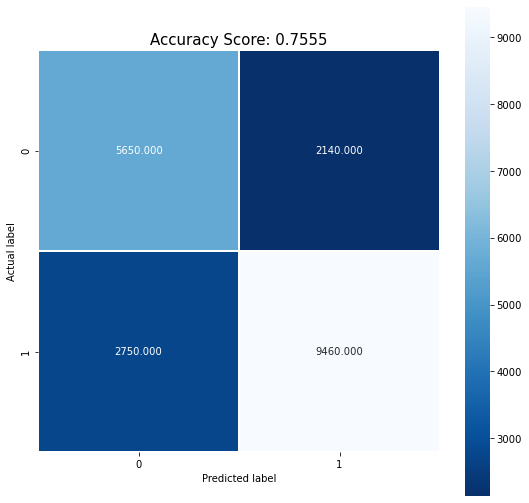

In [51]:
cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [53]:
#sns.pairplot(taxi, hue='hour')
#wanted to do this but it was taking way too long

In [55]:
from sklearn.metrics import fbeta_score

In [62]:
print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n F-beta: %.4f \n ROC-AUC: %.4f' %
        (accuracy_score(y_test, preds), 
         precision_score(y_test, preds), 
         recall_score(y_test, preds),
         f1_score(y_test, preds),
         fbeta_score(y_test, preds, beta = 2),
         roc_auc_score(y_test, preds)
        )
     )

Logistic regression validation metrics: 
 Accuracy: 0.7555 
 Precision: 0.8155 
 Recall: 0.7748 
 F1: 0.7946 
 F-beta: 0.7826 
 ROC-AUC: 0.7500


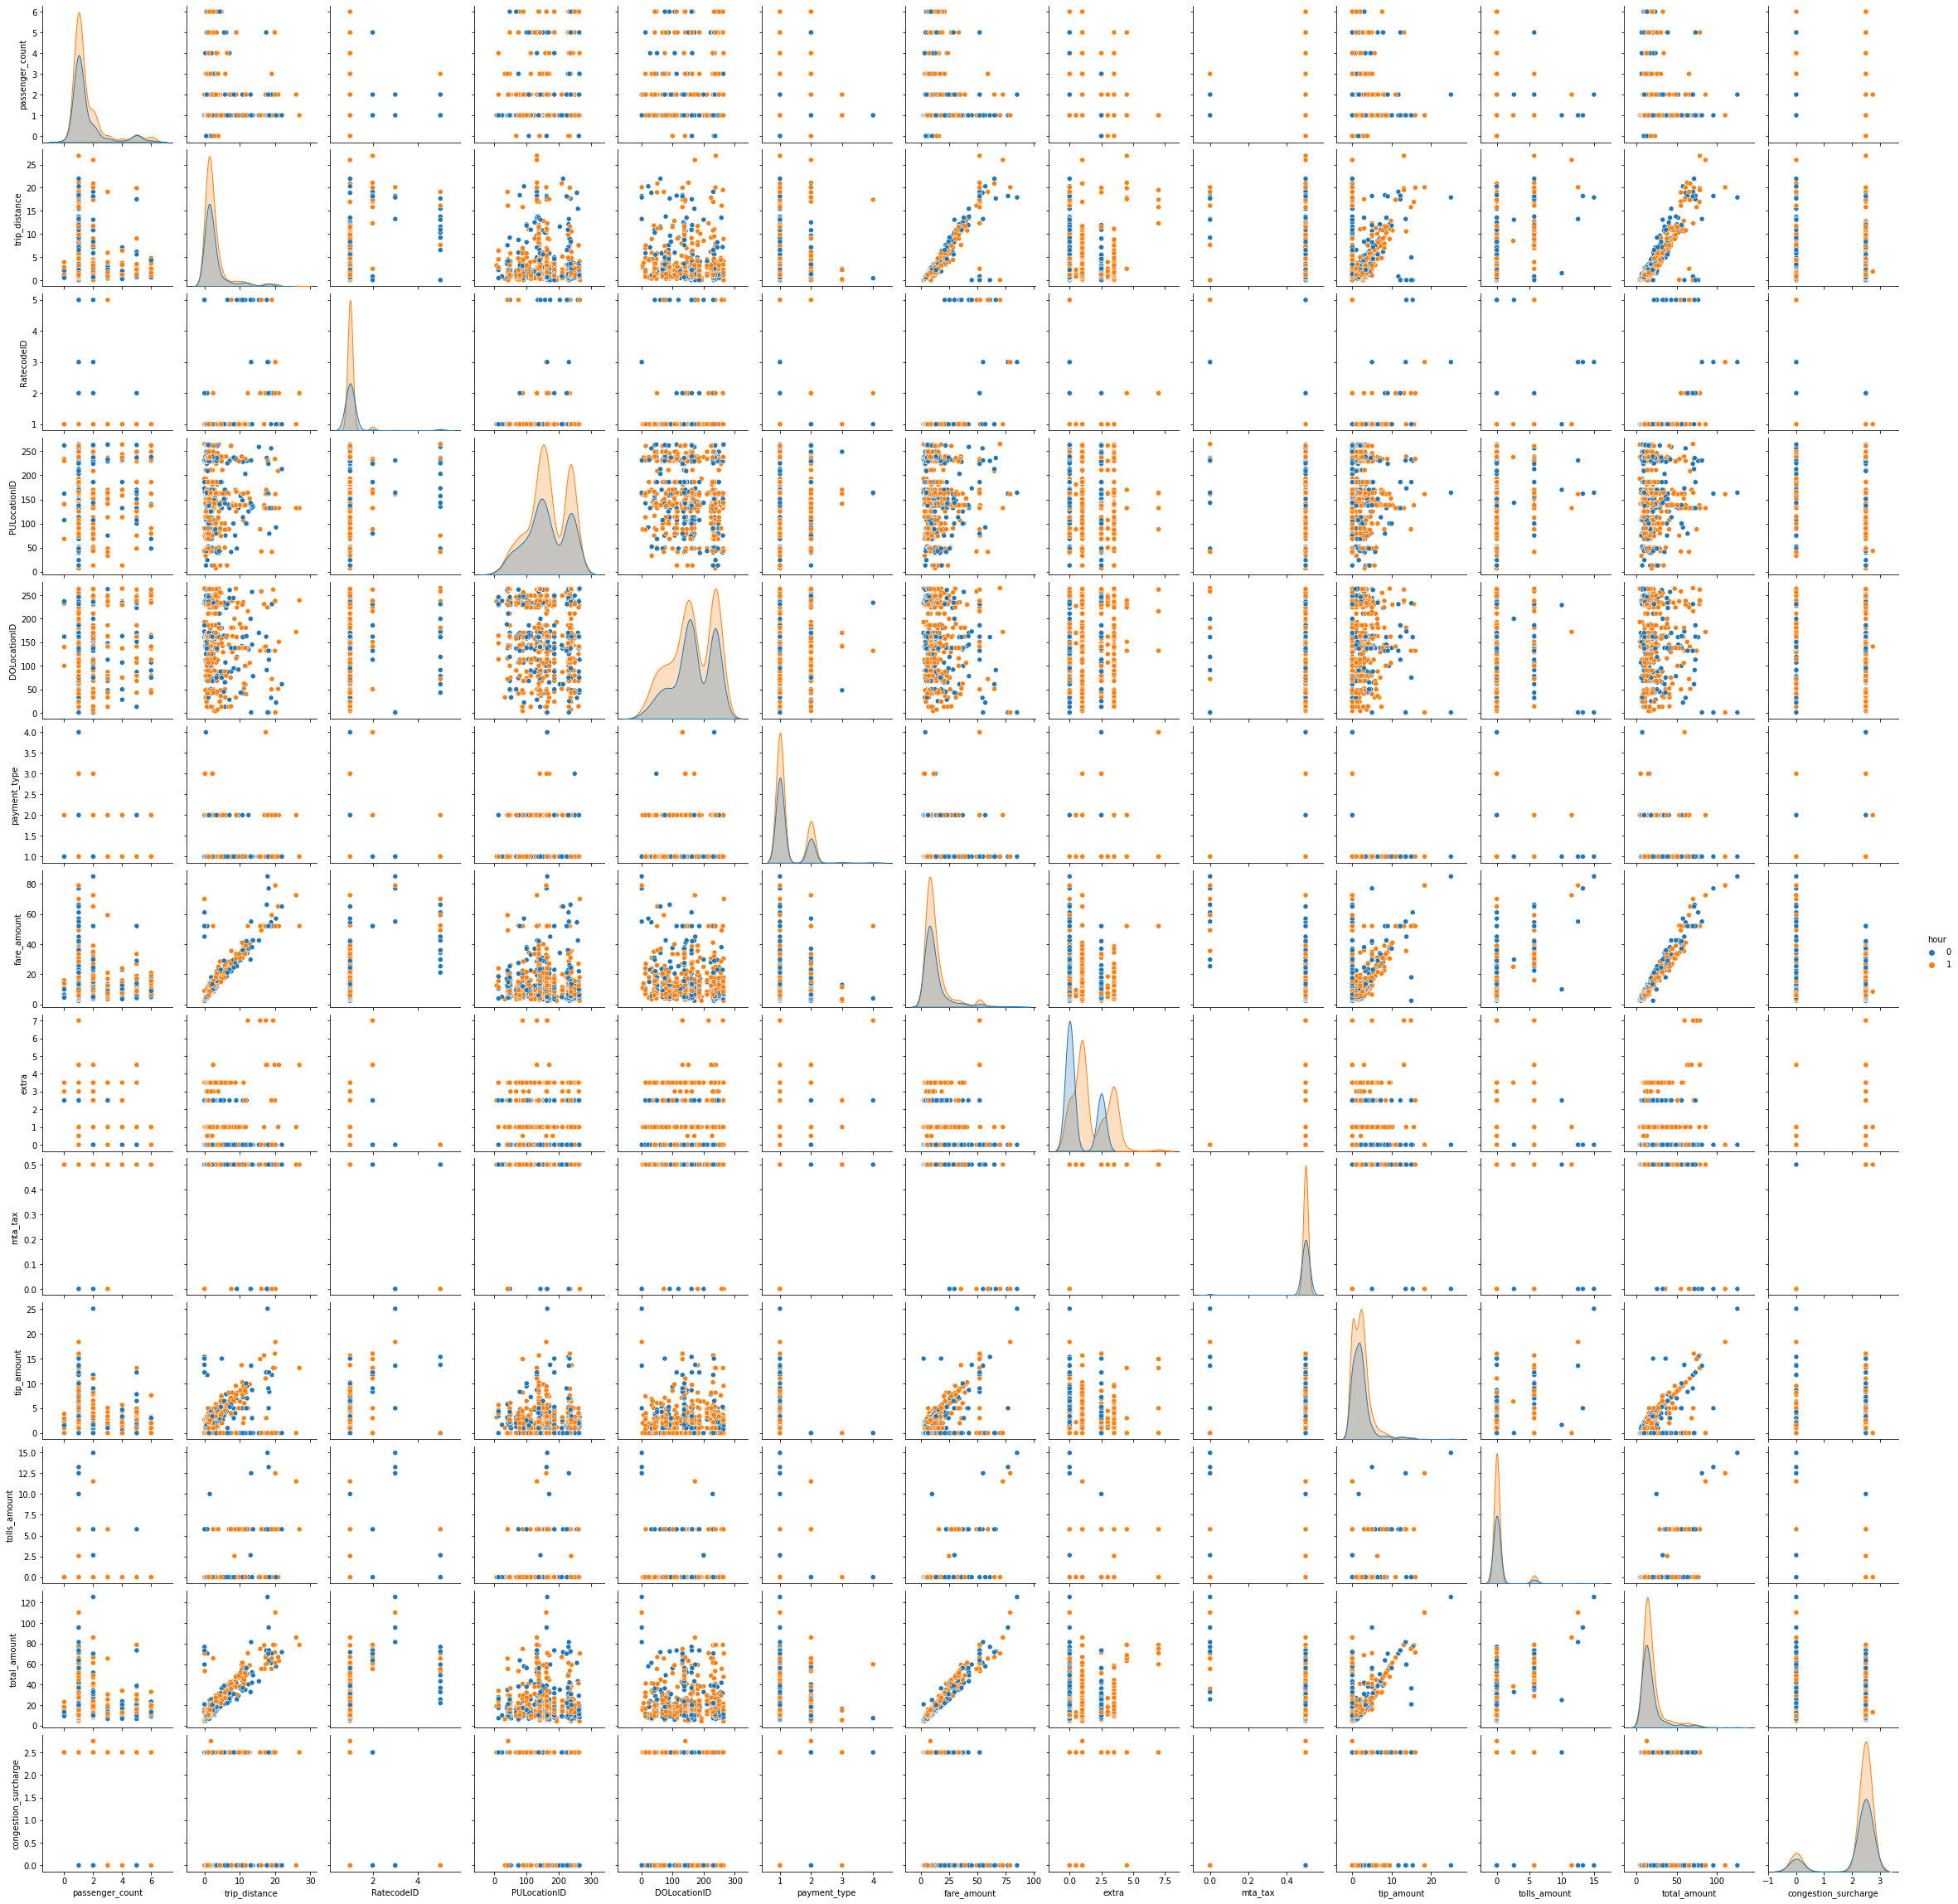

In [64]:
sns.pairplot(taxi.sample(1000), hue='hour')
#extra has some separation
#linear relationships between: money amounts + distance

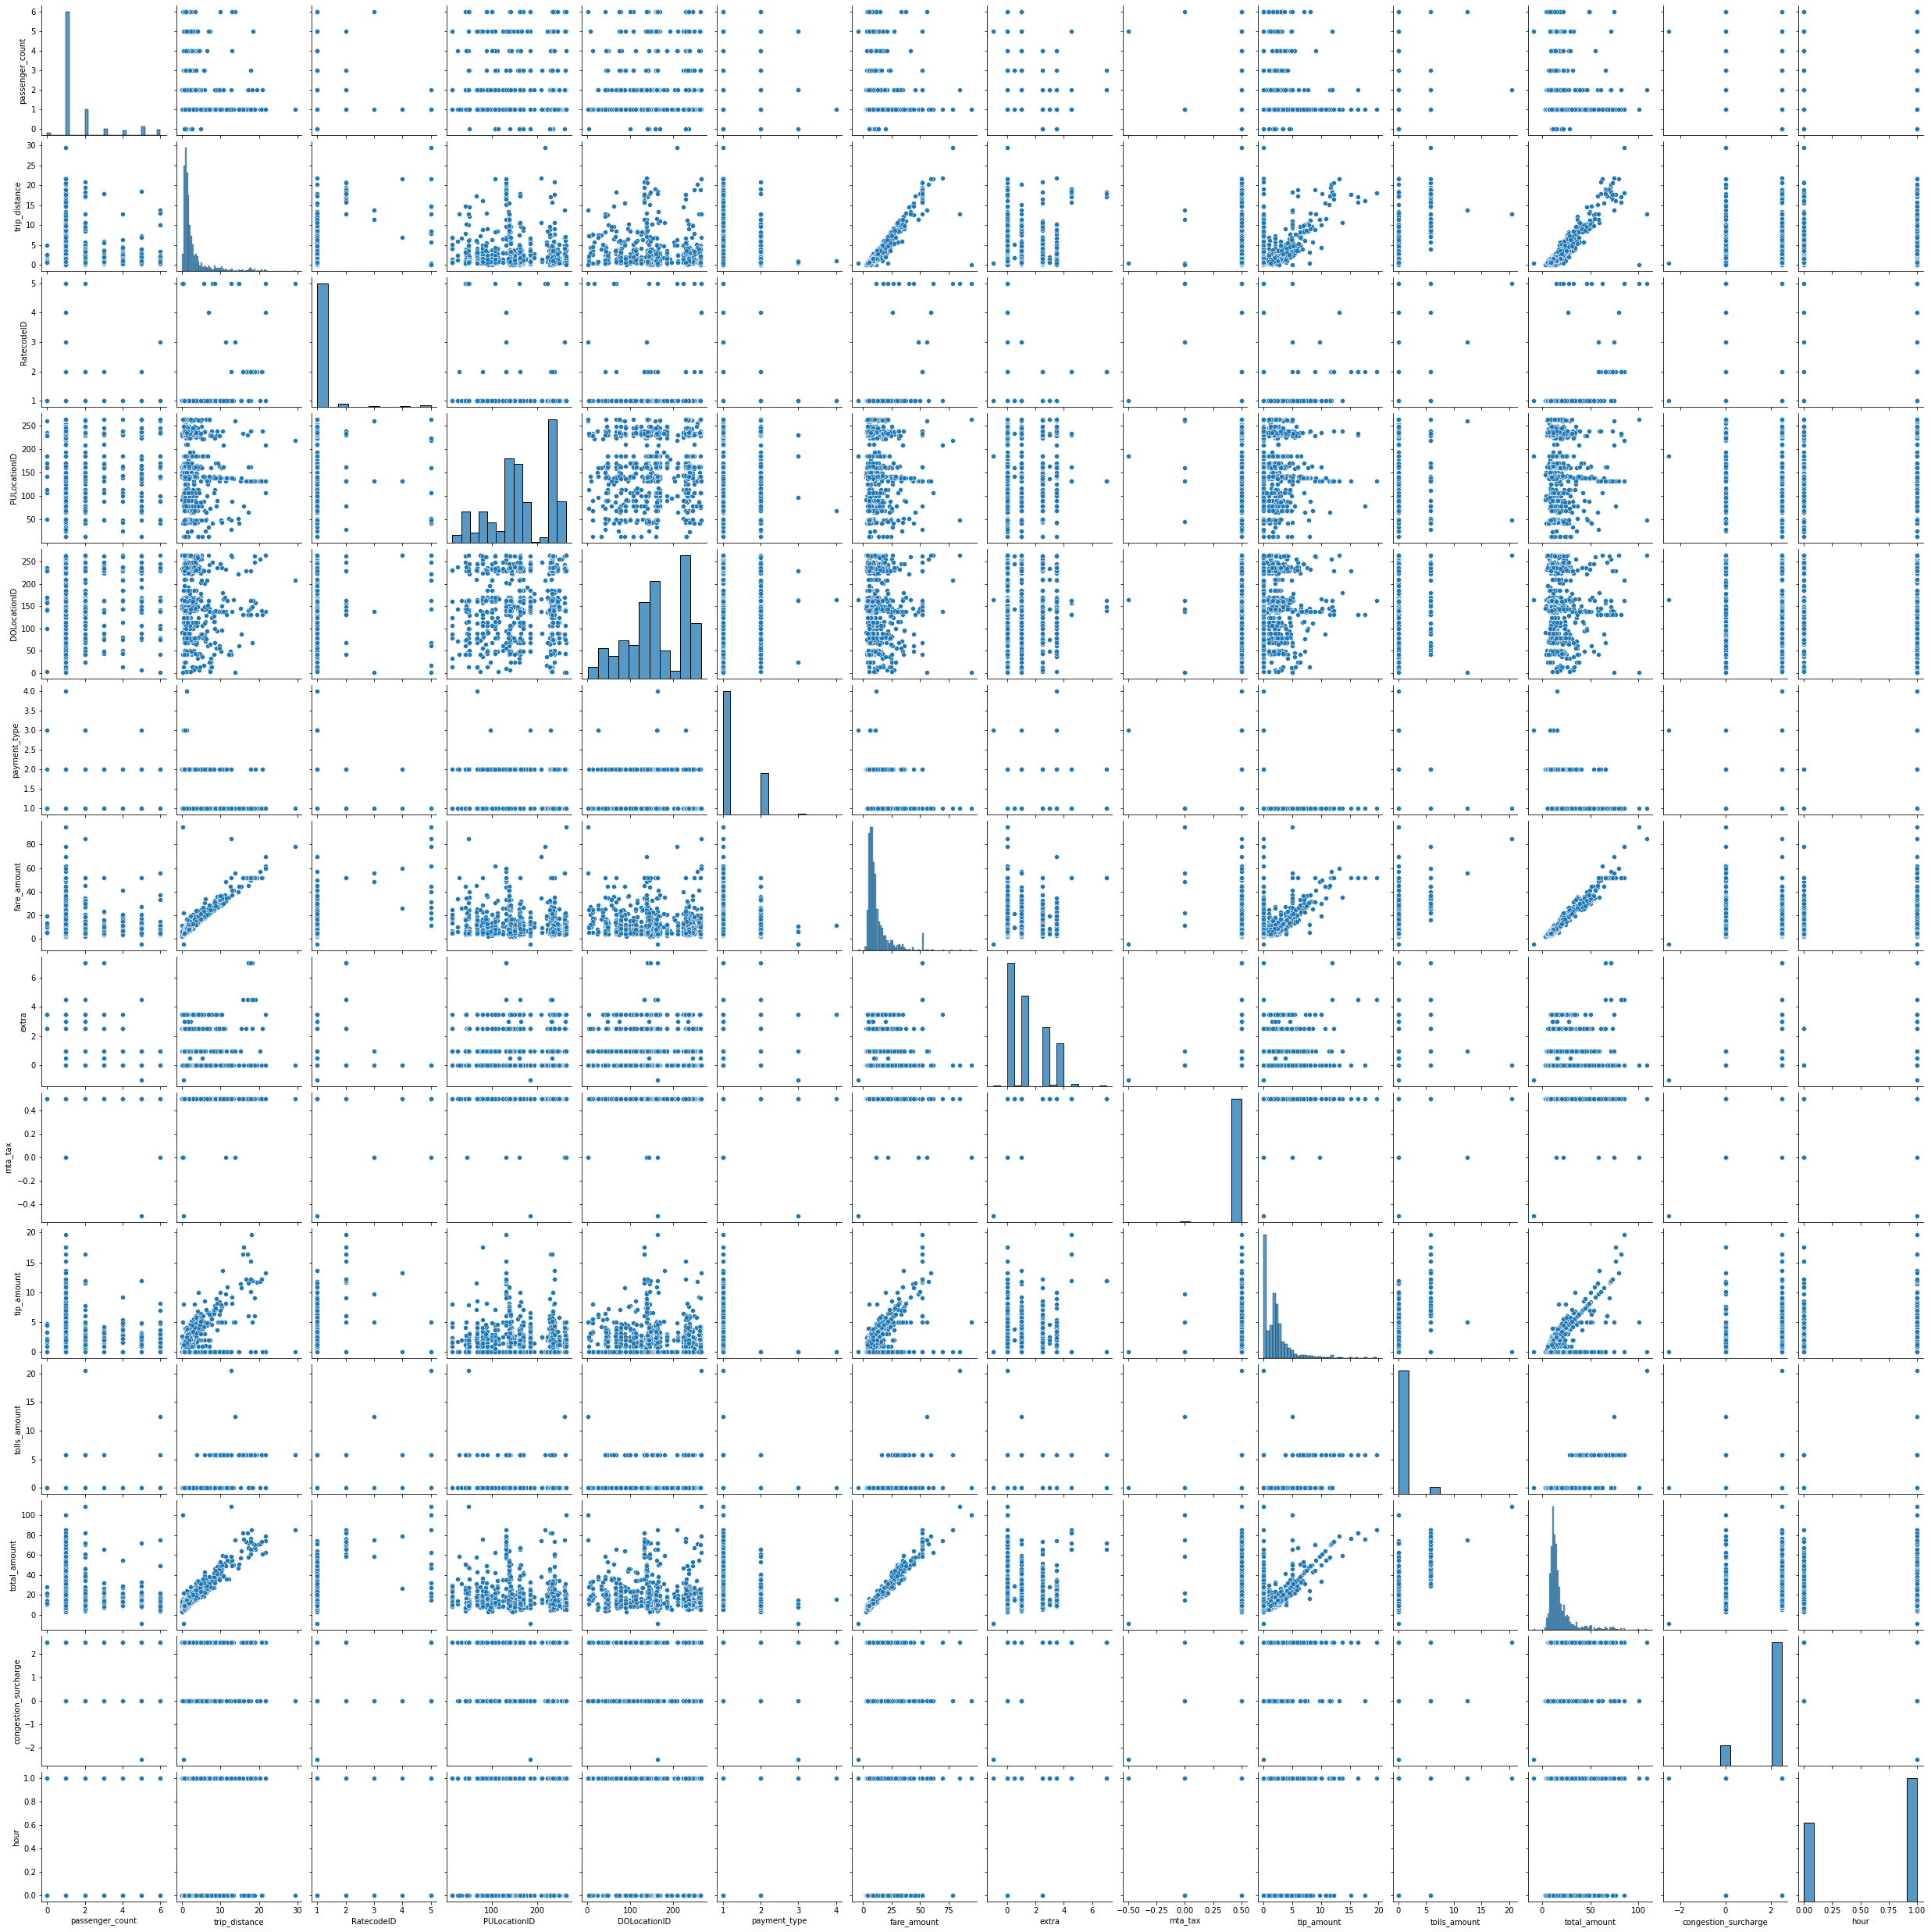

In [65]:
sns.pairplot(taxi.sample(1000))
#look at payment type, fare, tolls, total

In [79]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
from sklearn import tree

In [162]:
dtc = tree.DecisionTreeClassifier()

In [163]:
dtc = dtc.fit(X_train, y_train)

[Text(209.07946315949988, 215.07652173913044, 'X[7] <= 0.25\ngini = 0.474\nsamples = 80000\nvalue = [30828, 49172]'),
 Text(149.45409167874826, 210.3495652173913, 'X[4] <= 248.5\ngini = 0.43\nsamples = 30340\nvalue = [20826, 9514]'),
 Text(88.37822734770992, 205.62260869565216, 'X[4] <= 158.5\ngini = 0.424\nsamples = 28451\nvalue = [19767, 8684]'),
 Text(45.78092079122904, 200.89565217391305, 'X[12] <= 0.375\ngini = 0.455\nsamples = 12986\nvalue = [8435, 4551]'),
 Text(15.582326488488317, 196.1686956521739, 'X[2] <= 4.5\ngini = 0.398\nsamples = 3216\nvalue = [2336, 880]'),
 Text(10.296289604310862, 191.44173913043477, 'X[7] <= -0.5\ngini = 0.37\nsamples = 2864\nvalue = [2163, 701]'),
 Text(10.264185587488136, 186.71478260869566, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(10.328393621133587, 186.71478260869566, 'X[4] <= 64.5\ngini = 0.364\nsamples = 2842\nvalue = [2163, 679]'),
 Text(4.290306818462747, 181.98782608695652, 'X[3] <= 131.5\ngini = 0.433\nsamples = 976\nvalue = [66

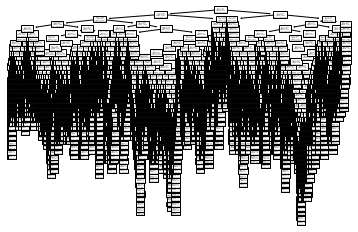

In [71]:
tree.plot_tree(dtc) #need to prune!

In [164]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [75]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9988
Test score 0.78545
Train Confusion matrix


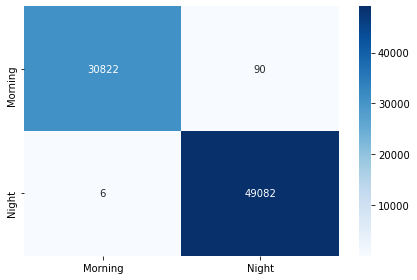

Test Confusion matrix


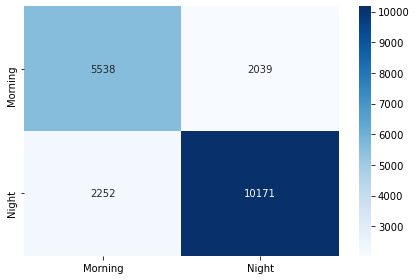

In [78]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test') #model is clearly overfitting

In [81]:
tree.DecisionTreeClassifier().get_params() #control depth, min sample split, min samples leaf

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [224]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

dt = tree.DecisionTreeClassifier()
dtgcv = GridSearchCV(estimator=dt,param_grid=params)
dtgcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.828925
Test score 0.82665
Train Confusion matrix


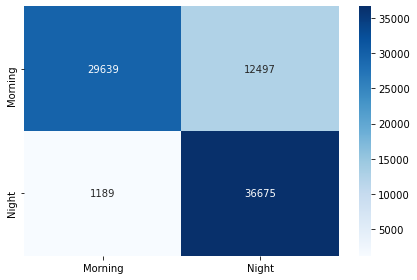

Test Confusion matrix


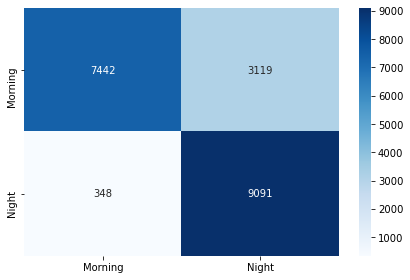

In [225]:
tmodel = dtgcv.best_estimator_
tmodel.fit(X_train,y_train)
yt_train_pred = tmodel.predict(X_train)
yt_test_pred = tmodel.predict(X_test)

print(f'Train score {accuracy_score(yt_train_pred,y_train)}')
print(f'Test score {accuracy_score(yt_test_pred,y_test)}')
plot_confusionmatrix(yt_train_pred,y_train,dom='Train')
plot_confusionmatrix(yt_test_pred,y_test,dom='Test') #scores went down but overfitting was reduced

In [125]:
yt_train_pred

array([0, 0, 1, ..., 0, 0, 1])

In [89]:
taxi.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','DateTime'], axis=1, inplace=True) #dropping unnecessary columns

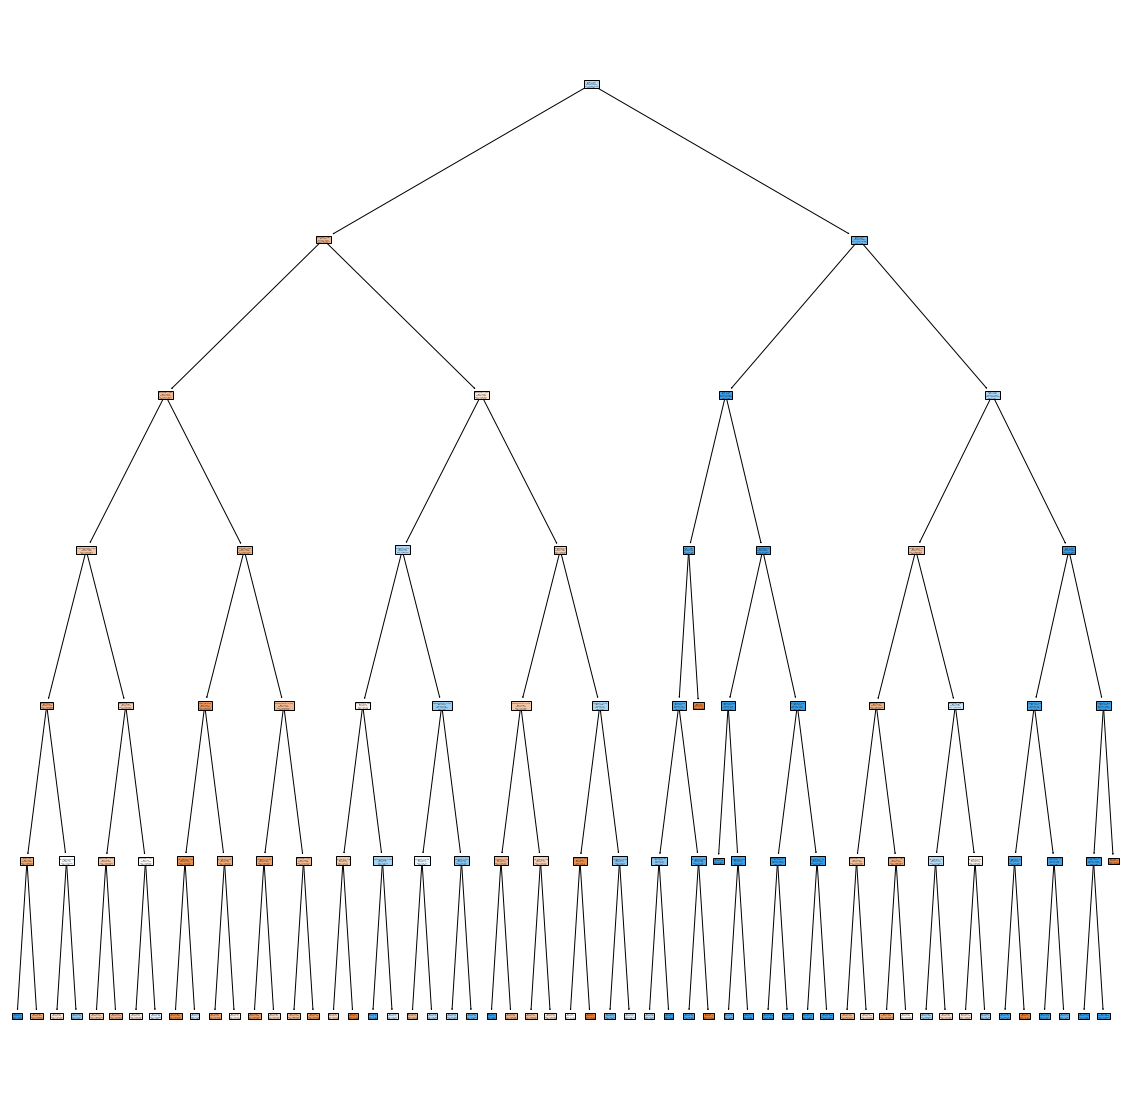

In [90]:
plt.figure(figsize=(20,20))
features = taxi.columns
classes = ['Morning','Night']
tree.plot_tree(tmodel,feature_names=features,class_names=classes,filled=True)
plt.show() #looks better, but still huge

In [114]:
print('Decision Tree validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n F-beta: %.4f \n ROC-AUC: %.4f' %
        (accuracy_score(y_test, yt_test_pred), 
         precision_score(y_test, yt_test_pred), 
         recall_score(y_test, yt_test_pred),
         f1_score(y_test, yt_test_pred),
         fbeta_score(y_test, yt_test_pred, beta = 2),
         roc_auc_score(y_test, yt_test_pred)
        )
     )

Decision Tree validation metrics: 
 Accuracy: 0.8267 
 Precision: 0.9631 
 Recall: 0.7446 
 F1: 0.8399 
 F-beta: 0.7800 
 ROC-AUC: 0.8500


In [108]:
print(classification_report(y_test, yt_test_pred))
print(accuracy_score(y_test, yt_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81      7790
           1       0.96      0.74      0.84     12210

    accuracy                           0.83     20000
   macro avg       0.83      0.85      0.83     20000
weighted avg       0.86      0.83      0.83     20000

0.8267


In [97]:
#cost complexity pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
len(ccp_alphas) #the problem is that there are a ton of alphas because my dataset is huge....cell ran for 20+ minutes and still didn't finish
#will come back to this if time permits

[0.         0.         0.         ... 0.00417504 0.05799501 0.11075809]


5238

In [98]:
# For each alpha we will append our model to a list
#clfs = []
#for ccp_alpha in ccp_alphas:
#    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
#    clf.fit(X_train, y_train)
#    clfs.append(clf)

In [ ]:
dt.feature_importances_

In [111]:
sc = StandardScaler() #standardizing data + normalize before doing this!
sX_train = sc.fit_transform(X_train)
sX_test = sc.transform(X_test)

In [131]:
rfr = RandomForestClassifier(n_estimators=20, random_state=0) #random forest test
rfr.fit(X_train, y_train)
yrf_pred = rfr.predict(X_test)

In [128]:
y_train

1586754    0
343219     0
4668581    1
489715     1
3766276    1
          ..
1176690    1
2769985    1
5551734    0
4280781    1
1447745    1
Name: hour, Length: 80000, dtype: int64

In [132]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n F-beta: %.4f \n ROC-AUC: %.4f' %
        (accuracy_score(y_test, yrf_pred), 
         precision_score(y_test, yrf_pred), 
         recall_score(y_test, yrf_pred),
         f1_score(y_test, yrf_pred),
         fbeta_score(y_test, yrf_pred, beta = 2),
         roc_auc_score(y_test, yrf_pred)
        )
     ) #change y to integers

Random Forest validation metrics: 
 Accuracy: 0.8206 
 Precision: 0.8991 
 Recall: 0.7955 
 F1: 0.8441 
 F-beta: 0.8143 
 ROC-AUC: 0.8278


In [133]:
print(classification_report(y_test, yrf_pred))
print(accuracy_score(y_test, yrf_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      7790
           1       0.90      0.80      0.84     12210

    accuracy                           0.82     20000
   macro avg       0.81      0.83      0.82     20000
weighted avg       0.83      0.82      0.82     20000

0.82065


In [127]:
yrf_pred

array([0.4 , 0.95, 1.  , ..., 1.  , 0.2 , 0.2 ])

In [148]:
slr = LogisticRegression()
slr.fit(sX_train, y_train)
slrpreds = lr.predict(sX_test)
#standardizing data

In [149]:
slr.coef_ #coefficients are higher

array([[ 1.02115043e-01,  8.51605065e-03,  6.84232613e-02,
         3.14672609e-02, -3.78347010e-02,  1.09496836e-01,
        -4.02581066e+01,  1.81287348e-01, -3.10573174e-01,
        -9.36853864e+00, -5.59687550e+00,  4.97342301e+01,
        -2.88780116e+00]])

In [150]:
print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n F-beta: %.4f \n ROC-AUC: %.4f' %
        (accuracy_score(y_test, slrpreds), 
         precision_score(y_test, slrpreds), 
         recall_score(y_test, slrpreds),
         f1_score(y_test, slrpreds),
         fbeta_score(y_test, slrpreds, beta = 2),
         roc_auc_score(y_test, slrpreds)
        )
     )

Logistic regression validation metrics: 
 Accuracy: 0.4628 
 Precision: 0.6766 
 Recall: 0.2300 
 F1: 0.3433 
 F-beta: 0.2650 
 ROC-AUC: 0.5289


In [165]:
# Create first pipeline for logistic regression model using standardized data

pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])


In [227]:
# Create param grid
param_grid = [
    { #wanted to look at solver and penalty as well, but was taking 2+ hours
    #'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    #'classifier__solver' : ['liblinear']
    }
]

In [235]:
# Create grid search object
lrgs = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=1)

In [236]:
# Fit on data
lrgs.fit(sX_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             param_grid=[{'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])}],
             verbose=1)

In [237]:
lrgs.best_params_

{'classifier__C': 0.615848211066026}

In [238]:
lrgs_pred = lrgs.predict(sX_test)

In [239]:
print(classification_report(y_test, lrgs_pred)) #all metrics look a lot better!

              precision    recall  f1-score   support

           0       0.69      0.98      0.81      7790
           1       0.98      0.72      0.83     12210

    accuracy                           0.82     20000
   macro avg       0.83      0.85      0.82     20000
weighted avg       0.87      0.82      0.82     20000



In [240]:
print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n F-beta: %.4f \n ROC-AUC: %.4f' %
        (accuracy_score(y_test, lrgs_pred), 
         precision_score(y_test, lrgs_pred), 
         recall_score(y_test, lrgs_pred),
         f1_score(y_test, lrgs_pred),
         fbeta_score(y_test, lrgs_pred, beta = 2),
         roc_auc_score(y_test, lrgs_pred)
        )
     )

Logistic regression validation metrics: 
 Accuracy: 0.8175 
 Precision: 0.9806 
 Recall: 0.7153 
 F1: 0.8272 
 F-beta: 0.7562 
 ROC-AUC: 0.8466


In [234]:
#tune random forest model
fpipe = Pipeline([('classifier' , RandomForestClassifier())])

In [254]:
fparam_grid = [
    {'classifier__max_depth': [2, 3, 4, 5, 6],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : [5, 10, 15, 20]}
]

In [255]:
# Create grid search object
fgs = GridSearchCV(fpipe, fparam_grid, cv = 5, n_jobs=-1, verbose=1)

In [256]:
fgs.fit(sX_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 20.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier__max_depth': [2, 3, 4, 5, 6],
                          'classifier__max_features': [5, 10, 15, 20],
                          'classifier__n_estimators': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]}],
             verbose=1)

In [257]:
fgs.best_params_

{'classifier__max_depth': 6,
 'classifier__max_features': 10,
 'classifier__n_estimators': 100}

In [261]:
fgs_pred = fgs.predict(sX_test)

In [259]:
print(classification_report(y_test, lrgs_pred)) 

              precision    recall  f1-score   support

           0       0.69      0.98      0.81      7790
           1       0.98      0.72      0.83     12210

    accuracy                           0.82     20000
   macro avg       0.83      0.85      0.82     20000
weighted avg       0.87      0.82      0.82     20000



In [260]:
print('Random forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n F-beta: %.4f \n ROC-AUC: %.4f' %
        (accuracy_score(y_test, fgs_pred), 
         precision_score(y_test, fgs_pred), 
         recall_score(y_test, fgs_pred),
         f1_score(y_test, fgs_pred),
         fbeta_score(y_test, fgs_pred, beta = 2),
         roc_auc_score(y_test, fgs_pred)
        )
     )

Random forest validation metrics: 
 Accuracy: 0.8274 
 Precision: 0.9645 
 Recall: 0.7446 
 F1: 0.8404 
 F-beta: 0.7802 
 ROC-AUC: 0.8508


In [263]:
rfr.feature_importances_

array([0.02821358, 0.12473315, 0.00254663, 0.09888963, 0.10801287,
       0.00643855, 0.06475592, 0.41673016, 0.00066577, 0.05285881,
       0.00271288, 0.08450845, 0.00893359])

In [269]:
fpipe.named_steps

{'classifier': RandomForestClassifier()}

In [273]:
fpipe.steps

[('classifier', RandomForestClassifier())]

In [275]:
fgs.best_estimator_.named_steps['classifier'].feature_importances_

array([1.65914374e-02, 3.15580242e-03, 1.90364577e-03, 1.90233301e-03,
       2.59691477e-02, 1.51346569e-03, 2.98053526e-03, 9.26988781e-01,
       1.03806676e-04, 1.65571905e-03, 1.08437668e-04, 1.13424249e-02,
       5.78446390e-03])

In [279]:
taxi.head() #passenger count, extra, dropoff location id, total amount most and tolls + tax least

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,hour
5706324,2,4.14,1,158,142,1,18.5,0.0,0.5,4.36,0.0,26.16,2.5,1
4033831,1,2.66,1,249,170,1,14.0,0.0,0.5,5.19,0.0,22.49,2.5,1
4041447,1,0.52,1,48,163,1,3.5,0.0,0.5,1.70,0.0,8.50,2.5,1
2327788,1,2.23,1,237,107,1,10.5,0.0,0.5,2.76,0.0,16.56,2.5,1
5415270,1,0.80,1,161,164,2,6.5,3.5,0.5,0.00,0.0,10.80,2.5,1


In [282]:
fmodel = fgs.best_estimator_
fmodel.fit(sX_train,y_train)
yf_train_pred = fmodel.predict(sX_train)
yf_test_pred = fmodel.predict(sX_test)

Train score 0.8295125
Test score 0.8272
Train Confusion matrix


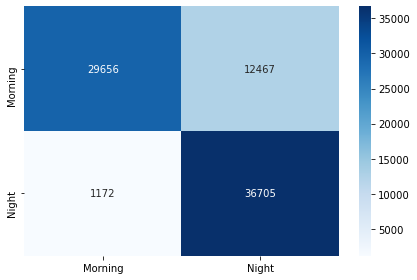

Test Confusion matrix


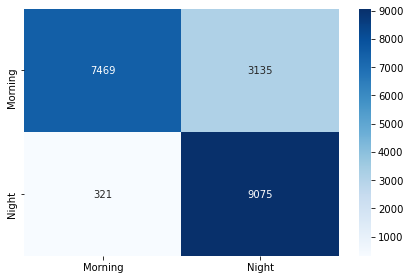

In [283]:
print(f'Train score {accuracy_score(yf_train_pred,y_train)}')
print(f'Test score {accuracy_score(yf_test_pred,y_test)}')
plot_confusionmatrix(yf_train_pred,y_train,dom='Train')
plot_confusionmatrix(yf_test_pred,y_test,dom='Test') #scores went down but overfitting was reduced